# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {Siphwe Ngcaweni}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Libraries for data preparation and model building
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.datasets import load_boston
boston = load_boston()

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
# load the data
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [4]:
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [5]:
df_train.shape

(8763, 49)

In [6]:
df_train.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
Unnamed: 0              8763 non-null int64
time                    8763 non-null object
Madrid_wind_speed       8763 non-null float64
Valencia_wind_deg       8763 non-null object
Bilbao_rain_1h          8763 non-null float64
Valencia_wind_speed     8763 non-null float64
Seville_humidity        8763 non-null float64
Madrid_humidity         8763 non-null float64
Bilbao_clouds_all       8763 non-null float64
Bilbao_wind_speed       8763 non-null float64
Seville_clouds_all      8763 non-null float64
Bilbao_wind_deg         8763 non-null float64
Barcelona_wind_speed    8763 non-null float64
Barcelona_wind_deg      8763 non-null float64
Madrid_clouds_all       8763 non-null float64
Seville_wind_speed      8763 non-null float64
Barcelona_rain_1h       8763 non-null float64
Seville_pressure        8763 non-null object
Seville_rain_1h         8763 non-null float64
Bilbao_snow_3h          

In [8]:
df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [9]:
# look at data statistics
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


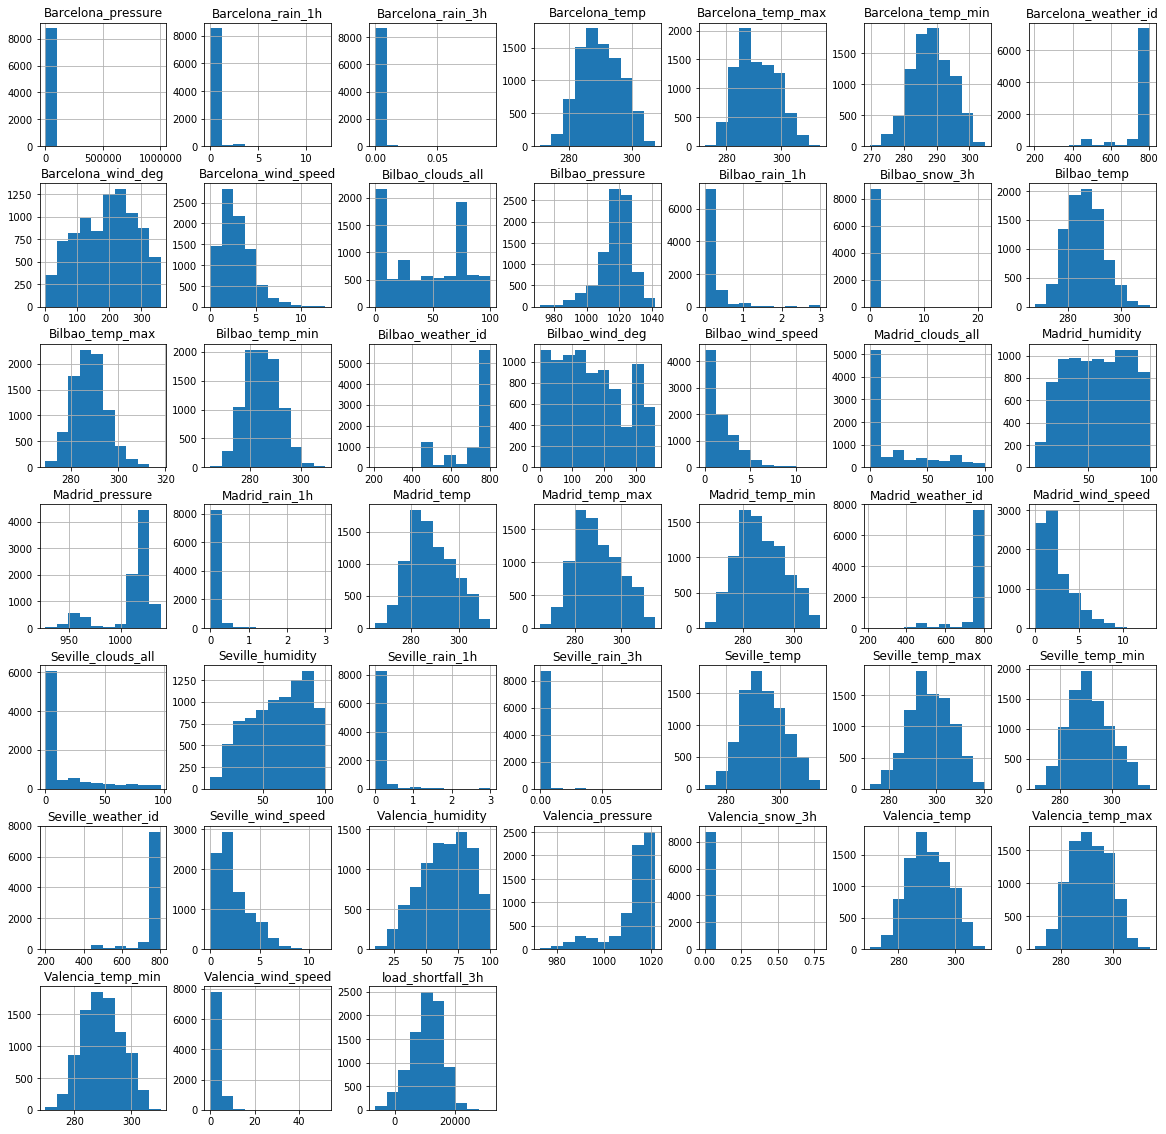

In [10]:
# plot relevant feature interactions
features = ['Madrid_wind_speed','Bilbao_rain_1h', 'Valencia_wind_speed','Seville_humidity','Madrid_humidity','Bilbao_clouds_all','Bilbao_wind_speed','Seville_clouds_all','Bilbao_wind_deg','Barcelona_wind_speed','Barcelona_wind_deg','Madrid_clouds_all','Seville_wind_speed','Barcelona_rain_1h','Seville_rain_1h','Bilbao_snow_3h','Barcelona_pressure','Seville_rain_3h','Madrid_rain_1h','Barcelona_rain_3h','Valencia_snow_3h','Madrid_weather_id','Barcelona_weather_id','Bilbao_pressure','Seville_weather_id','Valencia_pressure','Seville_temp_max','Madrid_pressure','Valencia_temp_max','Valencia_temp','Bilbao_weather_id','Seville_temp','Valencia_humidity','Valencia_temp_min','Barcelona_temp_max','Madrid_temp_max','Barcelona_temp','Bilbao_temp_min','Bilbao_temp','Barcelona_temp_min','Bilbao_temp_max','Seville_temp_min','Madrid_temp','Madrid_temp_min','load_shortfall_3h']
df_train[features].hist(figsize=(20,20));

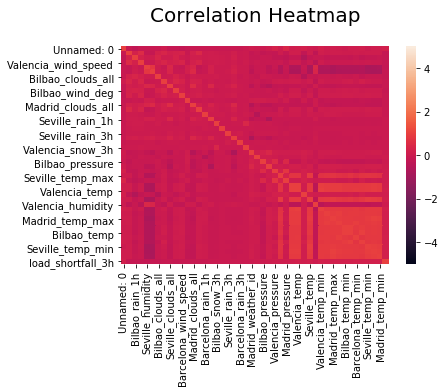

In [11]:
heatmap = sns.heatmap(df_train.corr(), vmin=-5, vmax=5, annot=False)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=25);

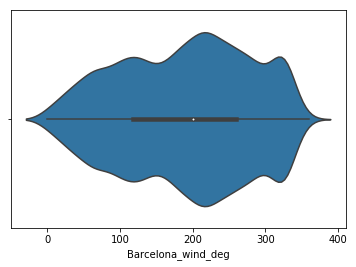

In [12]:
sns.violinplot(x='Barcelona_wind_deg', data=df_train);

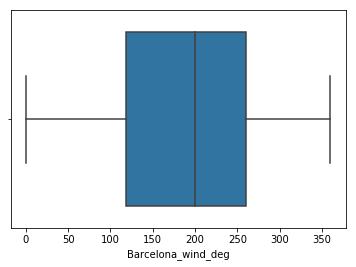

In [13]:
sns.boxplot(x='Barcelona_wind_deg', data=df_train);

In [14]:
# evaluate correlation
df_train.corr()


,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,...,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,-0.140583,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,-0.155738,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800


In [15]:
# have a look at feature distributions
df_train.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

In [16]:
df_train.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [17]:
df = pd.concat([df_train, df_test], sort=False) 
df.head

<bound method NDFrame.head of       Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0              0  2015-01-01 03:00:00           0.666667           level_5   
1              1  2015-01-01 06:00:00           0.333333          level_10   
2              2  2015-01-01 09:00:00           1.000000           level_9   
3              3  2015-01-01 12:00:00           1.000000           level_8   
4              4  2015-01-01 15:00:00           1.000000           level_7   
5              5  2015-01-01 18:00:00           1.000000           level_7   
6              6  2015-01-01 21:00:00           1.000000           level_8   
7              7  2015-01-02 00:00:00           1.000000           level_9   
8              8  2015-01-02 03:00:00           1.000000           level_9   
9              9  2015-01-02 06:00:00           1.000000           level_9   
10            10  2015-01-02 09:00:00           1.000000           level_9   
11            11  2015-01-02 12:00

In [18]:
df.shape

(11683, 49)

In [19]:
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2522
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

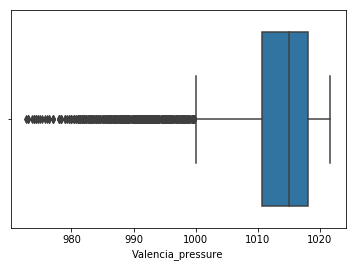

In [20]:
sns.boxplot(df['Valencia_pressure'])

In [21]:
print('Mode')
print(df['Valencia_pressure'].mode())
print('Mean')
print(df['Valencia_pressure'].mean())
print('Median')
print(df['Valencia_pressure'].median())

Mode
0    1018.0
dtype: float64
Mean
1012.3466870428985
Median
1015.0


In [22]:
# remove missing values/ features
df_clean = df
df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode()[0])

In [23]:
df_clean.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure          0
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [24]:
df_clean.dtypes

Unnamed: 0                int64
time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_p

In [25]:
df_clean['time'] = pd.to_datetime(df_clean['time'])

In [26]:
# create new features
df_clean['Day'] = pd.DatetimeIndex(df['time']).year
df_clean['Month'] = pd.DatetimeIndex(df['time']).month
df_clean['Year'] = pd.DatetimeIndex(df['time']).day 
df_clean['Start_hour'] = pd.DatetimeIndex(df['time']).hour
df_clean['Start_minute'] = pd.DatetimeIndex(df['time']).minute
df_clean['Start_second'] = pd.DatetimeIndex(df['time']).second
df_clean['Start_weekday'] = pd.DatetimeIndex(df['time']).weekday
df_clean['Start_week_of_year'] = pd.DatetimeIndex(df['time']).week


In [27]:
df_clean.dtypes

Unnamed: 0                       int64
time                    datetime64[ns]
Madrid_wind_speed              float64
Valencia_wind_deg               object
Bilbao_rain_1h                 float64
Valencia_wind_speed            float64
Seville_humidity               float64
Madrid_humidity                float64
Bilbao_clouds_all              float64
Bilbao_wind_speed              float64
Seville_clouds_all             float64
Bilbao_wind_deg                float64
Barcelona_wind_speed           float64
Barcelona_wind_deg             float64
Madrid_clouds_all              float64
Seville_wind_speed             float64
Barcelona_rain_1h              float64
Seville_pressure                object
Seville_rain_1h                float64
Bilbao_snow_3h                 float64
Barcelona_pressure             float64
Seville_rain_3h                float64
Madrid_rain_1h                 float64
Barcelona_rain_3h              float64
Valencia_snow_3h               float64
Madrid_weather_id        

In [28]:
# engineer existing features
df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\d+)')

In [29]:
df_clean['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
5        7
6        8
7        9
8        9
9        9
10       9
11       9
12       7
13       7
14       8
15       9
16       8
17       8
18       8
19       9
20       8
21       8
22       9
23       9
24       9
25       9
26       9
27       8
28       6
29       4
        ..
2890    10
2891    10
2892     4
2893     3
2894     2
2895     5
2896    10
2897     7
2898     9
2899     9
2900     3
2901     4
2902     6
2903     9
2904     9
2905     9
2906     9
2907    10
2908     4
2909     2
2910     6
2911     9
2912     8
2913     7
2914     9
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 11683, dtype: object

In [30]:
df_clean['Valencia_wind_deg'] = pd.to_numeric(df_clean['Valencia_wind_deg'])

In [31]:
df_clean['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
5        7
6        8
7        9
8        9
9        9
10       9
11       9
12       7
13       7
14       8
15       9
16       8
17       8
18       8
19       9
20       8
21       8
22       9
23       9
24       9
25       9
26       9
27       8
28       6
29       4
        ..
2890    10
2891    10
2892     4
2893     3
2894     2
2895     5
2896    10
2897     7
2898     9
2899     9
2900     3
2901     4
2902     6
2903     9
2904     9
2905     9
2906     9
2907    10
2908     4
2909     2
2910     6
2911     9
2912     8
2913     7
2914     9
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 11683, dtype: int64

In [32]:
df_clean.Seville_pressure

0       sp25
1       sp25
2       sp25
3       sp25
4       sp25
5       sp25
6       sp25
7       sp25
8       sp25
9       sp25
10      sp25
11      sp25
12      sp25
13      sp25
14      sp25
15      sp25
16      sp25
17      sp25
18      sp25
19      sp25
20      sp25
21      sp25
22      sp25
23      sp25
24      sp25
25      sp25
26      sp25
27      sp25
28      sp25
29      sp25
        ... 
2890    sp22
2891    sp23
2892    sp22
2893    sp21
2894    sp21
2895    sp22
2896    sp22
2897    sp22
2898    sp21
2899    sp22
2900    sp22
2901    sp20
2902    sp21
2903    sp21
2904    sp21
2905    sp21
2906    sp21
2907    sp22
2908    sp22
2909    sp21
2910    sp22
2911    sp22
2912    sp23
2913    sp23
2914    sp23
2915    sp24
2916    sp24
2917    sp23
2918    sp23
2919    sp23
Name: Seville_pressure, Length: 11683, dtype: object

In [33]:
df_clean['Seville_pressure'] = df_clean['Seville_pressure'].str.extract('(\d+)')

In [34]:
df_clean['Seville_pressure']

0       25
1       25
2       25
3       25
4       25
5       25
6       25
7       25
8       25
9       25
10      25
11      25
12      25
13      25
14      25
15      25
16      25
17      25
18      25
19      25
20      25
21      25
22      25
23      25
24      25
25      25
26      25
27      25
28      25
29      25
        ..
2890    22
2891    23
2892    22
2893    21
2894    21
2895    22
2896    22
2897    22
2898    21
2899    22
2900    22
2901    20
2902    21
2903    21
2904    21
2905    21
2906    21
2907    22
2908    22
2909    21
2910    22
2911    22
2912    23
2913    23
2914    23
2915    24
2916    24
2917    23
2918    23
2919    23
Name: Seville_pressure, Length: 11683, dtype: object

In [35]:
df_clean['Seville_pressure'] = pd.to_numeric(df_clean['Seville_pressure'])

In [36]:
df_clean['Seville_pressure'] 

0       25
1       25
2       25
3       25
4       25
5       25
6       25
7       25
8       25
9       25
10      25
11      25
12      25
13      25
14      25
15      25
16      25
17      25
18      25
19      25
20      25
21      25
22      25
23      25
24      25
25      25
26      25
27      25
28      25
29      25
        ..
2890    22
2891    23
2892    22
2893    21
2894    21
2895    22
2896    22
2897    22
2898    21
2899    22
2900    22
2901    20
2902    21
2903    21
2904    21
2905    21
2906    21
2907    22
2908    22
2909    21
2910    22
2911    22
2912    23
2913    23
2914    23
2915    24
2916    24
2917    23
2918    23
2919    23
Name: Seville_pressure, Length: 11683, dtype: int64

In [37]:
df_clean = df_clean.drop(['Unnamed: 0', 'time'], axis = 1)

In [38]:
df_clean.dtypes

Madrid_wind_speed       float64
Valencia_wind_deg         int64
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure          int64
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_pressure         float64
Valencia_temp_max       float64
Valencia

In [39]:
df_clean.isnull().sum()

Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure          0
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp               0
Valencia_humid

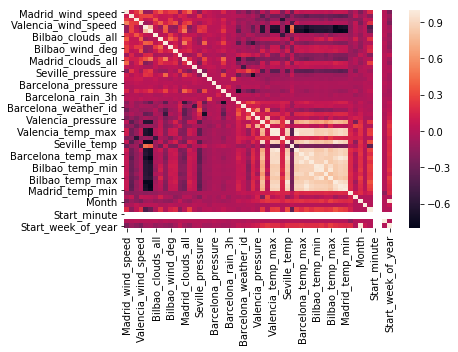

In [40]:
# plotting correlation heatmap
dataplot = sns.heatmap(df_clean.corr())
  
# displaying heatmap
plt.show()

In [41]:
df_clean.kurtosis()

Madrid_wind_speed          2.156333
Valencia_wind_deg         -1.205963
Bilbao_rain_1h            40.584429
Valencia_wind_speed       31.014311
Seville_humidity          -0.950169
Madrid_humidity           -1.151940
Bilbao_clouds_all         -1.519626
Bilbao_wind_speed          3.159652
Seville_clouds_all         1.950894
Bilbao_wind_deg           -1.064464
Barcelona_wind_speed       1.519692
Barcelona_wind_deg        -0.967252
Madrid_clouds_all         -0.076188
Seville_wind_speed         1.745508
Barcelona_rain_1h        130.956428
Seville_pressure          -1.234056
Seville_rain_1h           79.440881
Bilbao_snow_3h          1075.823322
Barcelona_pressure      4916.988101
Seville_rain_3h          552.067395
Madrid_rain_1h            63.372354
Barcelona_rain_3h        251.188884
Valencia_snow_3h        5452.830025
Madrid_weather_id          8.018543
Barcelona_weather_id       5.932283
Bilbao_pressure            1.847650
Seville_weather_id        10.402060
Valencia_pressure          4

In [42]:
df_clean.skew()

Madrid_wind_speed        1.452792
Valencia_wind_deg        0.002434
Bilbao_rain_1h           5.694539
Valencia_wind_speed      3.116352
Seville_humidity        -0.366033
Madrid_humidity         -0.076590
Bilbao_clouds_all       -0.068335
Bilbao_wind_speed        1.602522
Seville_clouds_all       1.765104
Bilbao_wind_deg          0.246848
Barcelona_wind_speed     1.072417
Barcelona_wind_deg      -0.140337
Madrid_clouds_all        1.158486
Seville_wind_speed       1.213437
Barcelona_rain_1h        9.833191
Seville_pressure         0.032323
Seville_rain_1h          7.535944
Bilbao_snow_3h          30.237039
Barcelona_pressure      66.949053
Seville_rain_3h         22.349167
Madrid_rain_1h           6.446514
Barcelona_rain_3h       14.668923
Valencia_snow_3h        73.090853
Madrid_weather_id       -2.909054
Barcelona_weather_id    -2.595417
Bilbao_pressure         -0.977531
Seville_weather_id      -3.230498
Valencia_pressure       -2.170499
Seville_temp_max         0.122162
Madrid_pressur

In [43]:
#df_clean[['Bilbao_snow_3h','Barcelona_pressure','Seville_rain_3h','Barcelona_rain_3h','Valencia_snow_3h']] = df_clean[['Bilbao_snow_3h','Barcelona_pressure','Seville_rain_3h','Barcelona_rain_3h','Valencia_snow_3h']].apply(np.log)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [44]:
# split data
y = df_clean[:len(df_train)][['load_shortfall_3h']]

x = df_clean[:len(df_train)].drop('load_shortfall_3h', axis=1)


#X_train =df_clean[:len(df_train)].drop('load_shortfall_3h', axis=1)
#X_test =df_clean[len(df_train):].drop('load_shortfall_3h', axis=1)

In [45]:
import sys
!{sys.executable} -m pip install xgboost

In [46]:
#from sklearn.datasets import load_boston
#boston = load_boston()

In [47]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [48]:
# create targets and features dataset
x.head()



,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp,Madrid_temp_min,Day,Month,Year,Start_hour,Start_minute,Start_second,Start_weekday,Start_week_of_year
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,265.938000,265.938000,2015,1,1,3,0,0,3,1
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,266.386667,266.386667,2015,1,1,6,0,0,3,1
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,272.708667,272.708667,2015,1,1,9,0,0,3,1
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,281.895219,281.895219,2015,1,1,12,0,0,3,1
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,280.678437,280.678437,2015,1,1,15,0,0,3,1


In [49]:
y.head()

,load_shortfall_3h
0,6715.666667
1,4171.666667
2,4274.666667
3,5075.666667
4,6620.666667


In [50]:
#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Train test split
#X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=123)

In [51]:
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X[:,np.newaxis])



In [52]:
#x = x[:np.newaxis]
#y = y[:np.newaxis]

In [53]:
#x_scaled = x_scaler.fit_transform(x)
#y_scaled = y_scaler.fit_transform(x)

In [54]:
#x_train = np.log(x_train)
#x_test = np.log(x_test)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21, shuffle = True)

In [56]:
xg_reg = xgb.XGBRegressor( )

In [57]:
xg_reg

XGBRegressor(base_score=None, booster=None, callbacks=None,
       colsample_bylevel=None, colsample_bynode=None,
       colsample_bytree=None, early_stopping_rounds=None,
       enable_categorical=False, eval_metric=None, gamma=None, gpu_id=None,
       grow_policy=None, importance_type=None,
       interaction_constraints=None, learning_rate=None, max_bin=None,
       max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
       max_leaves=None, min_child_weight=None, missing=nan,
       monotone_constraints=None, n_estimators=100, n_jobs=None,
       num_parallel_tree=None, objective='reg:squarederror',
       predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
       sampling_method=None, scale_pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=None, verbosity=None)

In [58]:
xg_reg.fit(x_train,y_train)

preds = xg_reg.predict(x_test)

In [59]:
xg_reg = xgb.XGBRegressor( )

In [60]:
xg_reg

XGBRegressor(base_score=None, booster=None, callbacks=None,
       colsample_bylevel=None, colsample_bynode=None,
       colsample_bytree=None, early_stopping_rounds=None,
       enable_categorical=False, eval_metric=None, gamma=None, gpu_id=None,
       grow_policy=None, importance_type=None,
       interaction_constraints=None, learning_rate=None, max_bin=None,
       max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
       max_leaves=None, min_child_weight=None, missing=nan,
       monotone_constraints=None, n_estimators=100, n_jobs=None,
       num_parallel_tree=None, objective='reg:squarederror',
       predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
       sampling_method=None, scale_pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=None, verbosity=None)

In [60]:
data_dmatrix = xgb.DMatrix(data=x, label=y)

In [61]:
data_dmatrix

In [62]:
from xgboost import cv

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [61]:
# Compare model performance
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [62]:
rmse(y_test, preds)

2574.1105034499788

In [63]:
from sklearn.metrics import r2_score

In [64]:
r2_score(y_test, preds)

0.7463855553247529

In [65]:
x_train = df_clean[:len(df_train)].drop('load_shortfall_3h', axis=1)
x_test = df_clean[len(df_train):].drop('load_shortfall_3h', axis=1)

In [66]:
xg_reg.fit(x_train,y)

preds = xg_reg.predict(x_test)

In [67]:
daf= pd.DataFrame(preds, columns= ['load_shortfall_3h'])

In [68]:
daf.head()

,load_shortfall_3h
0,11039.101562
1,3341.060303
2,4850.291016
3,8202.256836
4,12389.567383


In [356]:
output = pd.DataFrame({"time":df_test['time']})
submission2 = output.join(daf)
submission2.to_csv("submission2.csv", index=False)

In [357]:
submission2

,time,load_shortfall_3h
0,2018-01-01 00:00:00,11039.101562
1,2018-01-01 03:00:00,3341.060303
2,2018-01-01 06:00:00,4850.291016
3,2018-01-01 09:00:00,8202.256836
4,2018-01-01 12:00:00,12389.567383
5,2018-01-01 15:00:00,10996.207031
6,2018-01-01 18:00:00,9031.311523
7,2018-01-01 21:00:00,13225.354492
8,2018-01-02 00:00:00,9984.191406
9,2018-01-02 03:00:00,4960.784668


In [71]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

# discuss chosen methods logic
The XGBOOST is the best performing model from the rest that was tested